In [67]:
%%capture
!pip install linearmodels

In [68]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import os, sys
parent_dir = os.path.abspath('../../')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
from functions.exploratory_analysis import create_scatter_plots_grid
from functions.pooled_ols import create_balanced_panel, regression_model_statsmodels, regression_model_linearmodels, analyze_regression_results, analyze_linearmodels_regression_results
from functions.create_panel_dataset import remove_outliers

In [69]:
foundational_df_no_transformations = pd.read_csv('output/foundational_no_transformations.csv')
foundational_df_transformed = pd.read_csv('output/foundational_transformed.csv')
foundational_df_no_transformations_accounts = pd.read_csv('output/foundational_no_transformations_accounts.csv')
foundational_df_transformed_accounts = pd.read_csv('output/foundational_transformed_accounts.csv')
foundational_df_no_transformations_exiobase = pd.read_csv('output/foundational_df_no_transformations_exiobase.csv')
foundational_df_transformed_exiobase = pd.read_csv('output/foundational_df_transformed_exiobase.csv')
foundational_df_no_transformations_accounts_exiobase = pd.read_csv('output/foundational_df_no_transformations_accounts_exiobase.csv')
foundational_df_transformed_accounts_exiobase = pd.read_csv('output/foundational_df_transformed_accounts_exiobase.csv')

In [70]:
time_periods = [2012, 2016, 2020]
time_periods_accounts = [year for year in range(1995, 2020)]
foundational_df_transformed_unbalanced = foundational_df_transformed.copy()
foundational_df_unbalanced_no_transformations = foundational_df_no_transformations.copy()
foundational_df_transformed_unbalanced_accounts = foundational_df_transformed_accounts.copy()
foundational_df_unbalanced_no_transformations_accounts = foundational_df_no_transformations_accounts.copy()
foundational_df_transformed_unbalanced_exiobase = foundational_df_transformed_exiobase.copy()
foundational_df_unbalanced_no_transformations_exiobase = foundational_df_no_transformations_exiobase.copy()
foundational_df_transformed_unbalanced_accounts_exiobase = foundational_df_transformed_accounts_exiobase.copy()
foundational_df_unbalanced_no_transformations_accounts_exiobase = foundational_df_no_transformations_accounts_exiobase.copy()

Values from the StandardScaler used to transform the data (not used now but could be useful e.g for plots?)

In [71]:
scaler_df = pd.read_csv('output/scaler_values.csv')
energy_scale = scaler_df.loc[scaler_df['variable'] == 'energy', 'scale'].values[0]
energy_mean = scaler_df.loc[scaler_df['variable'] == 'energy', 'mean'].values[0]

## Hypothesis

The higher the share of employment/labor in the Foundational sector of the economy (Material or Providential), the higher the chance that related needs could be met at a low level of energy use

## Key assumptions and parameters (TBD)

For now just a p-value, might add more constants here later

In [72]:
assumptions = {'p_value_threshold': 0.05}

## Removing outliers

In [73]:
create_scatter_plots_grid(foundational_df_no_transformations, 'TIME_PERIOD', ['energy'], time_periods)

In [74]:
create_scatter_plots_grid(foundational_df_no_transformations, 'TIME_PERIOD', ['overlooked', 'material', 'providential', 'other'], time_periods)

Same for accounts data

In [75]:
foundational_df_no_transformations_accounts_selected_years = foundational_df_no_transformations_accounts[foundational_df_no_transformations_accounts['TIME_PERIOD'].isin(time_periods_accounts)]
create_scatter_plots_grid(foundational_df_no_transformations_accounts_selected_years, 'TIME_PERIOD', ['energy'], time_periods_accounts)

In [76]:
create_scatter_plots_grid(foundational_df_no_transformations_accounts_selected_years, 'TIME_PERIOD', ['overlooked', 'material', 'providential', 'other'], time_periods_accounts)

Based on visual inspection, LU 2008, AL 2016, AL 2020, TR 2016, IS 2008, MT 2012 are outliers for labour cost survey, and EE 1996, LV 2001, 2004, 2008, 2009, 2010, 2014,2017 (Basically just Latvia) for accounts.

Providential data looks suspicious in general in the accounts dataset, but let's roll with it for now.

In [77]:
outliers_to_remove = [{'geo': 'TR', 'TIME_PERIOD': 2012}, {'geo': 'TR', 'TIME_PERIOD': 2016}, {'geo': 'MT', 'TIME_PERIOD': 2012}, {'geo': 'CY', 'TIME_PERIOD': 2012}]
outliers_to_remove_accounts = [{'geo': 'EE', 'TIME_PERIOD': 1996}, {'geo': 'EE', 'TIME_PERIOD': 2019}]

foundational_df_transformed_no_outliers = remove_outliers(outliers_to_remove, foundational_df_transformed_unbalanced, ['LU'])
foundational_df_no_transformations_no_outliers = remove_outliers(outliers_to_remove, foundational_df_unbalanced_no_transformations, ['LU'])
foundational_df_transformed_no_outliers_accounts = remove_outliers(outliers_to_remove_accounts, foundational_df_transformed_unbalanced_accounts, ['LV', 'LU'])
foundational_df_no_transformations_no_outliers_accounts =  remove_outliers(outliers_to_remove_accounts, foundational_df_unbalanced_no_transformations_accounts, ['LV', 'LU'])

Number of rows in df: 114
Number of rows in df_no_outliers: 106
Number of rows in df: 114
Number of rows in df_no_outliers: 106
Number of rows in df: 820
Number of rows in df_no_outliers: 763
Number of rows in df: 820
Number of rows in df_no_outliers: 763


In [78]:
create_scatter_plots_grid(foundational_df_no_transformations_no_outliers, 'TIME_PERIOD', ['energy'], time_periods)

In [79]:
create_scatter_plots_grid(foundational_df_no_transformations_no_outliers, 'TIME_PERIOD', ['overlooked', 'material', 'providential', 'other'], time_periods)

In [80]:
create_scatter_plots_grid(foundational_df_no_transformations_no_outliers_accounts, 'TIME_PERIOD', ['energy'], time_periods_accounts)

In [81]:
create_scatter_plots_grid(foundational_df_no_transformations_no_outliers_accounts, 'TIME_PERIOD', ['overlooked', 'material', 'providential', 'other'], time_periods_accounts)

Looks like a bunch of overlooked ~= 0 observations but let's roll with it for now.

In [82]:
create_scatter_plots_grid(foundational_df_no_transformations_exiobase, 'TIME_PERIOD', ['energy'], time_periods)

In [83]:
create_scatter_plots_grid(foundational_df_no_transformations_exiobase, 'TIME_PERIOD', ['overlooked', 'material', 'providential', 'other'], time_periods)

In [84]:
foundational_df_no_transformations_accounts_exiobase_selected_years = foundational_df_no_transformations_accounts_exiobase[foundational_df_no_transformations_accounts_exiobase['TIME_PERIOD'].isin(time_periods_accounts)]
create_scatter_plots_grid(foundational_df_no_transformations_accounts_exiobase_selected_years, 'TIME_PERIOD', ['energy'], time_periods)

In [85]:
create_scatter_plots_grid(foundational_df_no_transformations_accounts_exiobase_selected_years, 'TIME_PERIOD', ['overlooked', 'material', 'providential', 'other'], time_periods_accounts)

In [86]:
outliers_to_remove_exiobase = [{'geo': 'LU', 'TIME_PERIOD': 2008}, {'geo': 'TR', 'TIME_PERIOD': 2012}, {'geo': 'TR', 'TIME_PERIOD': 2016}, {'geo': 'CY', 'TIME_PERIOD': 2012}, {'geo': 'MT', 'TIME_PERIOD': 2012}]
outliers_to_remove_exiobase_accounts = [{'geo': 'EE', 'TIME_PERIOD': 1996}, {'geo': 'EE', 'TIME_PERIOD': 2019}, {'geo': 'NO', 'TIME_PERIOD': 1995}, {'geo': 'LT', 'TIME_PERIOD': 1995}, {'geo': 'LT', 'TIME_PERIOD': 1996}, {'geo': 'BG', 'TIME_PERIOD': 1995}, {'geo': 'MT', 'TIME_PERIOD': 1995}]

foundational_df_transformed_no_outliers_exiobase = remove_outliers(outliers_to_remove_exiobase, foundational_df_transformed_unbalanced_exiobase, ['LU'])
foundational_df_no_transformations_no_outliers_exiobase = remove_outliers(outliers_to_remove_exiobase, foundational_df_unbalanced_no_transformations_exiobase, ['LU'])
foundational_df_transformed_no_outliers_accounts_exiobase = remove_outliers(outliers_to_remove_exiobase_accounts, foundational_df_transformed_unbalanced_accounts_exiobase, ['LV', 'LU'])
foundational_df_no_transformations_no_outliers_accounts_exiobase =  remove_outliers(outliers_to_remove_exiobase_accounts, foundational_df_unbalanced_no_transformations_accounts_exiobase, ['LV', 'LU'])

Number of rows in df: 114
Number of rows in df_no_outliers: 106
Number of rows in df: 114
Number of rows in df_no_outliers: 106
Number of rows in df: 820
Number of rows in df_no_outliers: 758
Number of rows in df: 820
Number of rows in df_no_outliers: 758


In [87]:
create_scatter_plots_grid(foundational_df_transformed_no_outliers_exiobase, 'TIME_PERIOD', ['energy'], time_periods)

In [88]:
create_scatter_plots_grid(foundational_df_transformed_no_outliers_exiobase, 'TIME_PERIOD', ['overlooked', 'material', 'providential', 'other'], time_periods)

In [89]:
create_scatter_plots_grid(foundational_df_transformed_no_outliers_accounts_exiobase, 'TIME_PERIOD', ['energy'], time_periods_accounts)

In [90]:
create_scatter_plots_grid(foundational_df_transformed_no_outliers_accounts_exiobase, 'TIME_PERIOD', ['overlooked', 'material', 'providential', 'other'], time_periods_accounts)

In [91]:
foundational_df_no_transformations_no_outliers_exiobase.to_csv('./output/foundational_df_no_transformations_no_outliers_exiobase.csv')
foundational_df_no_transformations_no_outliers_accounts_exiobase.to_csv('./output/foundational_df_no_transformations_no_outliers_accounts_exiobase.csv')

In [92]:
foundational_df_transformed_no_outliers_exiobase.to_csv('./output/foundational_df_transformed_no_outliers_exiobase.csv')
foundational_df_transformed_no_outliers_accounts_exiobase.to_csv('./output/foundational_df_transformed_no_outliers_accounts_exiobase.csv')

Plot after removing outliers

In [93]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'non-transformed schoolenr vs energy')

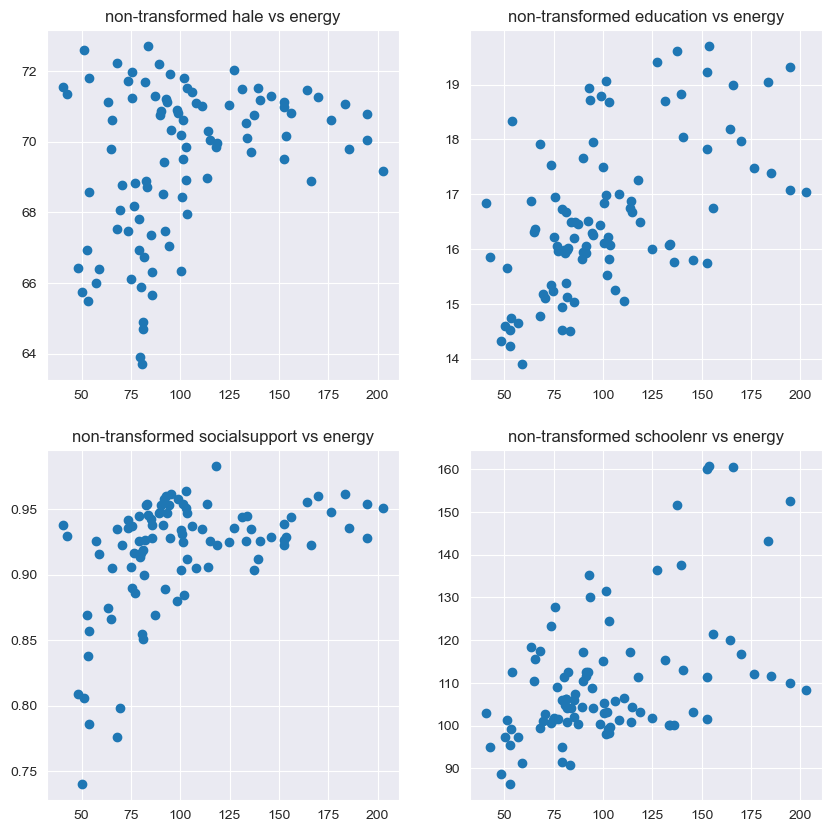

In [94]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(foundational_df_no_transformations_no_outliers["energy"], foundational_df_no_transformations_no_outliers["hale"])
axs[0, 0].set_title('non-transformed hale vs energy')
axs[0, 1].scatter(foundational_df_no_transformations_no_outliers["energy"], foundational_df_no_transformations_no_outliers["education"])
axs[0, 1].set_title('non-transformed education vs energy')
axs[1, 0].scatter(foundational_df_no_transformations_no_outliers["energy"], foundational_df_no_transformations_no_outliers["socialsupport"])
axs[1, 0].set_title('non-transformed socialsupport vs energy')
axs[1, 1].scatter(foundational_df_no_transformations_no_outliers["energy"], foundational_df_no_transformations_no_outliers["schoolenr"])
axs[1, 1].set_title('non-transformed schoolenr vs energy')

Text(0.5, 1.0, 'non-transformed schoolenr vs energy')

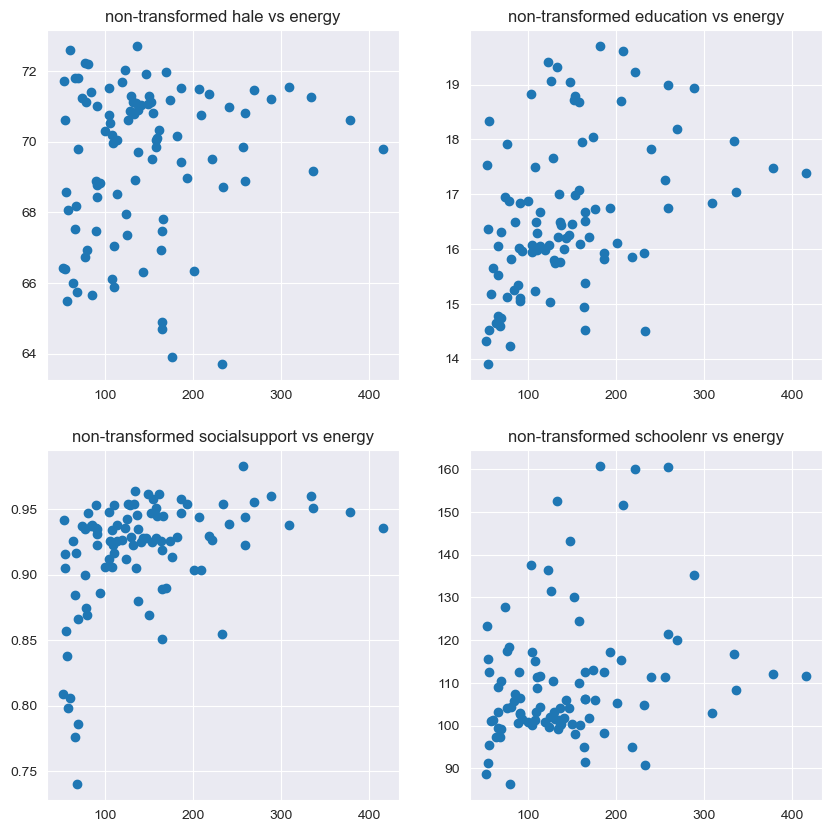

In [95]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(foundational_df_no_transformations_no_outliers_exiobase["energy"], foundational_df_no_transformations_no_outliers_exiobase["hale"])
axs[0, 0].set_title('non-transformed hale vs energy')
axs[0, 1].scatter(foundational_df_no_transformations_no_outliers_exiobase["energy"], foundational_df_no_transformations_no_outliers_exiobase["education"])
axs[0, 1].set_title('non-transformed education vs energy')
axs[1, 0].scatter(foundational_df_no_transformations_no_outliers_exiobase["energy"], foundational_df_no_transformations_no_outliers_exiobase["socialsupport"])
axs[1, 0].set_title('non-transformed socialsupport vs energy')
axs[1, 1].scatter(foundational_df_no_transformations_no_outliers_exiobase["energy"], foundational_df_no_transformations_no_outliers_exiobase["schoolenr"])
axs[1, 1].set_title('non-transformed schoolenr vs energy')

Text(0.5, 1.0, 'transformed schoolenr vs energy')

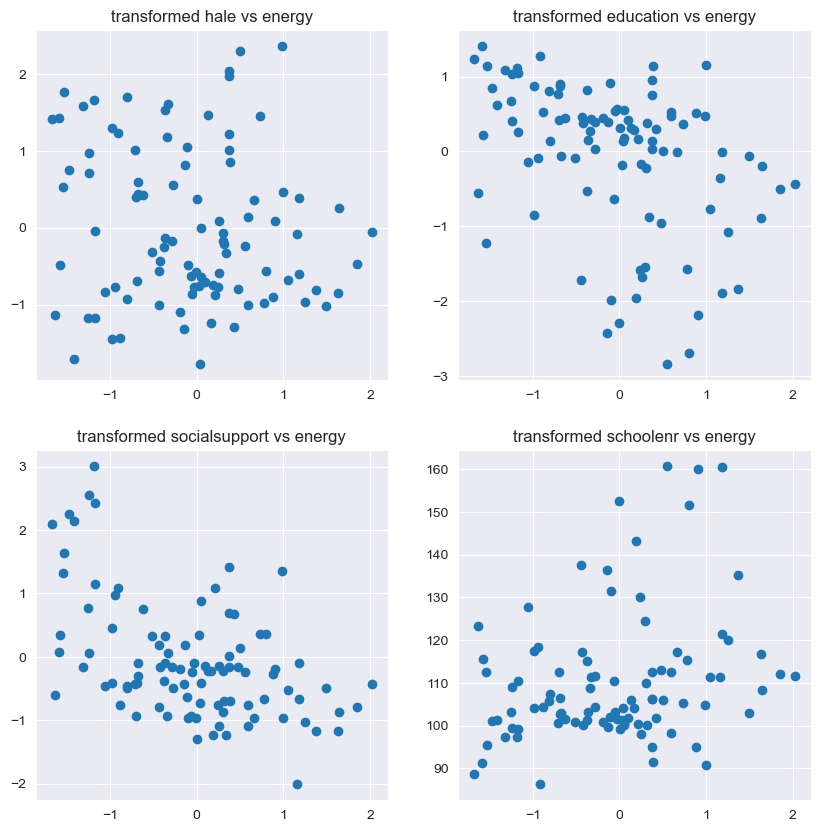

In [96]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(foundational_df_transformed_no_outliers_exiobase["energy"], foundational_df_transformed_no_outliers_exiobase["hale"])
axs[0, 0].set_title('transformed hale vs energy')
axs[0, 1].scatter(foundational_df_transformed_no_outliers_exiobase["energy"], foundational_df_transformed_no_outliers_exiobase["education"])
axs[0, 1].set_title('transformed education vs energy')
axs[1, 0].scatter(foundational_df_transformed_no_outliers_exiobase["energy"], foundational_df_transformed_no_outliers_exiobase["socialsupport"])
axs[1, 0].set_title('transformed socialsupport vs energy')
axs[1, 1].scatter(foundational_df_transformed_no_outliers_exiobase["energy"], foundational_df_transformed_no_outliers_exiobase["schoolenr"])
axs[1, 1].set_title('transformed schoolenr vs energy')

Text(0.5, 1.0, 'non-transformed schoolenr vs energy')

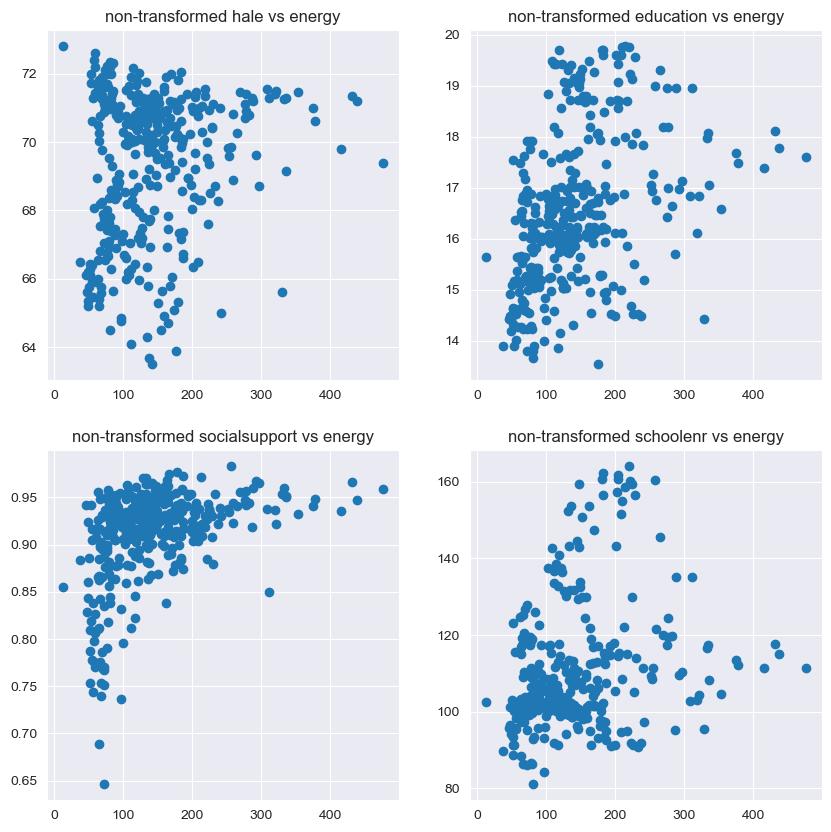

In [97]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(foundational_df_no_transformations_no_outliers_accounts_exiobase["energy"], foundational_df_no_transformations_no_outliers_accounts_exiobase["hale"])
axs[0, 0].set_title('non-transformed hale vs energy')
axs[0, 1].scatter(foundational_df_no_transformations_no_outliers_accounts_exiobase["energy"], foundational_df_no_transformations_no_outliers_accounts_exiobase["education"])
axs[0, 1].set_title('non-transformed education vs energy')
axs[1, 0].scatter(foundational_df_no_transformations_no_outliers_accounts_exiobase["energy"], foundational_df_no_transformations_no_outliers_accounts_exiobase["socialsupport"])
axs[1, 0].set_title('non-transformed socialsupport vs energy')
axs[1, 1].scatter(foundational_df_no_transformations_no_outliers_accounts_exiobase["energy"], foundational_df_no_transformations_no_outliers_accounts_exiobase["schoolenr"])
axs[1, 1].set_title('non-transformed schoolenr vs energy')

Text(0.5, 1.0, 'transformed schoolenr vs energy')

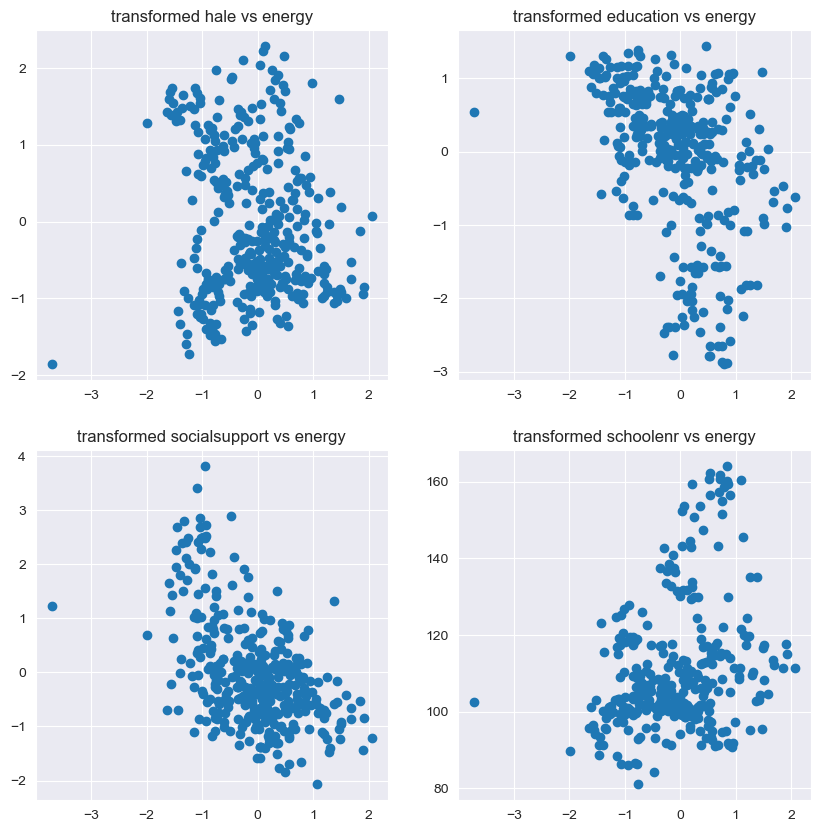

In [98]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(foundational_df_transformed_no_outliers_accounts_exiobase["energy"], foundational_df_transformed_no_outliers_accounts_exiobase["hale"])
axs[0, 0].set_title('transformed hale vs energy')
axs[0, 1].scatter(foundational_df_transformed_no_outliers_accounts_exiobase["energy"], foundational_df_transformed_no_outliers_accounts_exiobase["education"])
axs[0, 1].set_title('transformed education vs energy')
axs[1, 0].scatter(foundational_df_transformed_no_outliers_accounts_exiobase["energy"], foundational_df_transformed_no_outliers_accounts_exiobase["socialsupport"])
axs[1, 0].set_title('transformed socialsupport vs energy')
axs[1, 1].scatter(foundational_df_transformed_no_outliers_accounts_exiobase["energy"], foundational_df_transformed_no_outliers_accounts_exiobase["schoolenr"])
axs[1, 1].set_title('transformed schoolenr vs energy')

In [99]:
create_scatter_plots_grid(foundational_df_no_transformations_no_outliers, 'TIME_PERIOD', ['overlooked', 'material', 'providential', 'other'], time_periods)

In [100]:
foundational_df_no_transformations_no_outliers_accounts_selected_years = foundational_df_no_transformations_no_outliers_accounts[foundational_df_no_transformations_no_outliers_accounts['TIME_PERIOD'].isin(time_periods_accounts)]
create_scatter_plots_grid(foundational_df_no_transformations_no_outliers_accounts_selected_years, 'TIME_PERIOD', ['overlooked', 'material', 'providential', 'other'], time_periods_accounts)

In [101]:
create_scatter_plots_grid(foundational_df_no_transformations_exiobase, 'TIME_PERIOD', ['overlooked', 'material', 'providential', 'other'], time_periods)

In [102]:
foundational_df_no_transformations_no_outliers_accounts_exiobase_selected_years = foundational_df_no_transformations_no_outliers_accounts_exiobase[foundational_df_no_transformations_no_outliers_accounts_exiobase['TIME_PERIOD'].isin(time_periods_accounts)]
create_scatter_plots_grid(foundational_df_no_transformations_no_outliers_accounts_exiobase_selected_years, 'TIME_PERIOD', ['overlooked', 'material', 'providential', 'other'], time_periods_accounts)

## Creating a balanced panel

Balance the dataset by removing countries that don't have data for selected years.


Is the dataset balanced? False
Total number of observations: 763


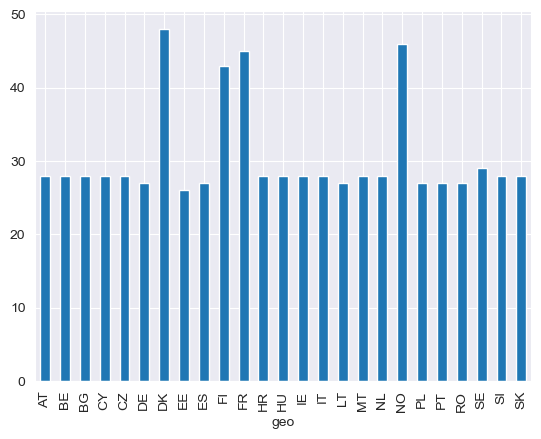

In [103]:
counts_accounts = foundational_df_transformed_no_outliers_accounts.groupby('geo')['TIME_PERIOD'].count()
counts_accounts.plot(kind='bar')
is_balanced_accounts = counts_accounts.nunique() == 1
print("Is the dataset balanced?", is_balanced_accounts)
total_observations_accounts = foundational_df_transformed_no_outliers_accounts.shape[0]
print("Total number of observations:", total_observations_accounts)

Is the dataset balanced? False
Total number of observations: 106


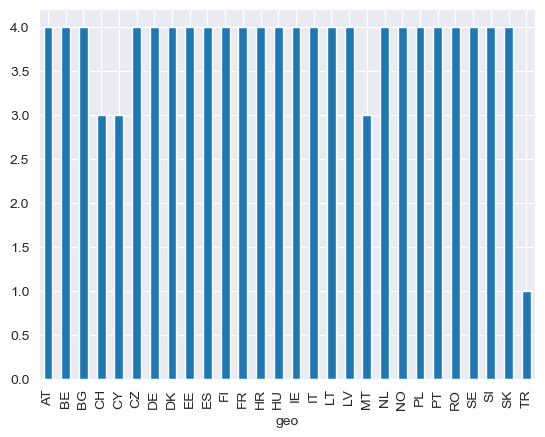

In [104]:
counts = foundational_df_transformed_no_outliers.groupby('geo')['TIME_PERIOD'].count()
counts.plot(kind='bar')
is_balanced = counts.nunique() == 1
print("Is the dataset balanced?", is_balanced)
total_observations = foundational_df_transformed_no_outliers.shape[0]
print("Total number of observations:", total_observations)

# Reproducing JV analysis with new data

Convenience functions

In [105]:
def perform_regressions(dataframe, independent_variable, dependent_vars, reg_types, input_assumptions, name):
    regressions = []
    for reg_type in reg_types:
        if len(dependent_vars) == 1:
            model = regression_model_linearmodels(dataframe, independent_variable, dependent_vars[0], reg_type)
        else:
            model = regression_model_linearmodels(dataframe, independent_variable, dependent_vars, reg_type, [dependent_vars])
        reg_type_formatted = reg_type.replace('_', ' ').title()
        model_name = f"{reg_type_formatted} {name}"
        goodness_of_fit = analyze_linearmodels_regression_results(model, input_assumptions, f"{reg_type_formatted} {name}", dataframe[independent_variable], reg_type)
        regressions.append({
            'model': model,
            'name': model_name,
            'data': dataframe,
            'dependent_variable': y_variable,
            'independent_variables': independent_variable,
            'goodness_of_fit': goodness_of_fit
        })
    return regressions


In [106]:
def create_datasets(dependent_variable, independent_variables):
    custom_time_periods_accounts = [year for year in range(2010, 2020)]
    regression_df_unbalanced = create_balanced_panel(foundational_df_transformed_no_outliers, time_periods, dependent_variable, independent_variables, balanced=False)
    regression_df_balanced = create_balanced_panel(foundational_df_transformed_no_outliers, time_periods, dependent_variable, independent_variables, balanced=True)
    regression_df_unbalanced_accounts = create_balanced_panel(foundational_df_transformed_no_outliers_accounts, time_periods_accounts, dependent_variable, independent_variables, balanced=False)
    regression_df_balanced_accounts = create_balanced_panel(foundational_df_transformed_no_outliers_accounts, custom_time_periods_accounts, dependent_variable, independent_variables, balanced=True)
    regression_df_unbalanced_exiobase = create_balanced_panel(foundational_df_transformed_no_outliers_exiobase, time_periods, dependent_variable, independent_variables, balanced=False)
    regression_df_balanced_exiobase = create_balanced_panel(foundational_df_transformed_no_outliers_exiobase, time_periods, dependent_variable, independent_variables, balanced=True)
    regression_df_unbalanced_accounts_exiobase = create_balanced_panel(foundational_df_transformed_no_outliers_accounts_exiobase, time_periods_accounts, dependent_variable, independent_variables, balanced=False)
    regression_df_balanced_accounts_exiobase = create_balanced_panel(foundational_df_transformed_no_outliers_accounts_exiobase, custom_time_periods_accounts, dependent_variable, independent_variables, balanced=True)
    return regression_df_unbalanced, regression_df_balanced, regression_df_unbalanced_accounts, regression_df_balanced_accounts, regression_df_unbalanced_exiobase, regression_df_balanced_exiobase, regression_df_unbalanced_accounts_exiobase, regression_df_balanced_accounts_exiobase

Always using the same three types of panel regression models

In [107]:
regression_types = ['pooled_ols', 'fixed_effects', 'random_effects']

# Bivariate regressions

$$
  \widetilde{NS}_i = a + b \widetilde{ENU}_i + e_i
$$

In [108]:
y_variables = ['hale', 'education', 'socialsupport']
x_variables = ['overlooked', 'material', 'providential', 'other']

In [109]:
bivariate_regressions_balanced = []
bivariate_regressions_unbalanced = []
bivariate_regressions_balanced_accounts = []
bivariate_regressions_unbalanced_accounts = []
bivariate_regressions_balanced_exiobase = []
bivariate_regressions_unbalanced_exiobase = []
bivariate_regressions_balanced_accounts_exiobase = []
bivariate_regressions_unbalanced_accounts_exiobase = []

In [110]:
import pandas as pd

def year_country_tradeoff_table(df, dependent_variable, independent_variables):
    # Combine dependent and independent variables into a single list for checking
    columns_to_check = [dependent_variable] + independent_variables

    # Identify rows with any missing data in the specified columns
    df_non_missing = df.dropna(subset=columns_to_check)

    # For each year, count the number of unique countries that have complete data
    countries_per_year = df_non_missing.groupby('TIME_PERIOD')['geo'].nunique().reset_index()
    countries_per_year.columns = ['Year', 'Number of Countries with Complete Data']

    # Optionally, sort by 'Number of Countries with Complete Data' to see the best years
    countries_per_year = countries_per_year.sort_values(by='Number of Countries with Complete Data', ascending=False)

    return countries_per_year

# Example usage:
# balanced_years = find_balanced_years(df, 'GDP', ['Population', 'Inflation', 'InterestRate'])
# print(balanced_years)

In [111]:

# Example usage:
balanced_years = year_country_tradeoff_table(regression_df_unbalanced_accounts, 'hale', ['energy'])
print(balanced_years)

    Year  Number of Countries with Complete Data
7   2012                                      25
9   2014                                      25
10  2015                                      25
11  2016                                      25
12  2017                                      25
13  2018                                      25
6   2011                                      24
8   2013                                      24
5   2010                                      23
14  2019                                      23
4   2009                                      16
2   2007                                      15
3   2008                                      15
0   2005                                      12
1   2006                                      11


Bivariate regressions, labour cost survey, IEA energy data

In [112]:
for y_variable in y_variables:
    regression_df_unbalanced, regression_df_balanced, regression_df_unbalanced_accounts, regression_df_balanced_accounts, regression_df_unbalanced_exiobase, regression_df_balanced_exiobase, regression_df_unbalanced_accounts_exiobase, regression_df_balanced_accounts_exiobase = create_datasets(y_variable, ['energy'])
    bivariate_regressions_balanced.extend(perform_regressions(regression_df_balanced, y_variable, ['energy'], regression_types, assumptions, "Bivariate balanced"))
    bivariate_regressions_unbalanced.extend(perform_regressions(regression_df_unbalanced, y_variable, ['energy'], regression_types, assumptions, "Bivariate unbalanced"))
    bivariate_regressions_balanced_accounts.extend(perform_regressions(regression_df_balanced_accounts, y_variable, ['energy'], regression_types, assumptions, "Bivariate balanced accounts"))
    bivariate_regressions_unbalanced_accounts.extend(perform_regressions(regression_df_unbalanced_accounts, y_variable, ['energy'], regression_types, assumptions, "Bivariate unbalanced accounts"))
    bivariate_regressions_balanced_exiobase.extend(perform_regressions(regression_df_balanced_exiobase, y_variable, ['energy'], regression_types, assumptions, "Bivariate balanced exiobase") )
    bivariate_regressions_unbalanced_exiobase.extend(perform_regressions(regression_df_unbalanced_exiobase, y_variable, ['energy'], regression_types, assumptions, "Bivariate unbalanced exiobase"))
    bivariate_regressions_balanced_accounts_exiobase.extend(perform_regressions(regression_df_balanced_accounts_exiobase, y_variable, ['energy'], regression_types, assumptions, "Bivariate balanced accounts exiobase"))
    bivariate_regressions_unbalanced_accounts_exiobase.extend(perform_regressions(regression_df_unbalanced_accounts_exiobase, y_variable, ['energy'], regression_types, assumptions, "Bivariate unbalanced accounts exiobase"))

Is the dataset balanced? True
Total number of observations: 220


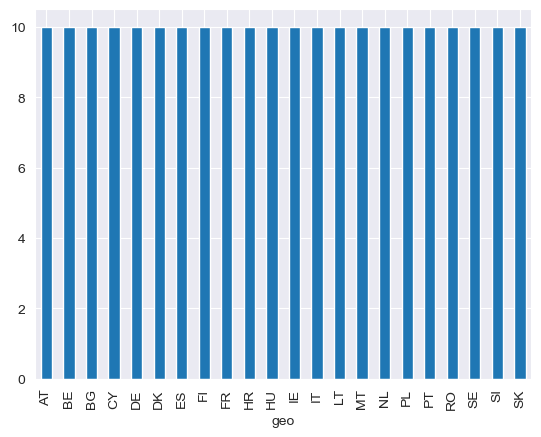

In [113]:
counts = regression_df_balanced_accounts.groupby('geo')['TIME_PERIOD'].count()
counts.plot(kind='bar')
is_balanced = counts.nunique() == 1
print("Is the dataset balanced?", is_balanced)
total_observations = regression_df_balanced_accounts.shape[0]
print("Total number of observations:", total_observations)

In [114]:
# optional QQ plots
# for reg in bivariate_regressions:
#     fig = sm.qqplot(data=reg.resid, line='45')
#     fig.suptitle('QQ plot for residuals of regression of {} on {} (labour cost survey)'.format('hale', ['energy']))

# Single provisioning factors regressions

$$
  \widetilde{NS}_i = a + b_1 \widetilde{ENU}_i + b_2 \widetilde{PF}_i  + b_3 \widetilde{ENU}_i * \widetilde{PF}_i + e_i
$$

In [115]:
single_regressions_balanced = []
single_regressions_unbalanced = []
single_regressions_balanced_accounts = []
single_regressions_unbalanced_accounts = []
single_regressions_balanced_exiobase = []
single_regressions_unbalanced_exiobase = []
single_regressions_balanced_accounts_exiobase = []
single_regressions_unbalanced_accounts_exiobase = []

In [116]:
for y_variable in y_variables:
    for x_variable in x_variables:
        regression_df_unbalanced, regression_df_balanced, regression_df_unbalanced_accounts, regression_df_balanced_accounts, regression_df_unbalanced_exiobase, regression_df_balanced_exiobase, regression_df_unbalanced_accounts_exiobase, regression_df_balanced_accounts_exiobase = create_datasets(y_variable, ['energy', x_variable])
        single_regressions_balanced.extend(perform_regressions(regression_df_balanced, y_variable, ['energy', x_variable], regression_types, assumptions, "Single balanced"))
        single_regressions_unbalanced.extend(perform_regressions(regression_df_unbalanced, y_variable, ['energy', x_variable], regression_types, assumptions, "Single unbalanced"))
        single_regressions_balanced_accounts.extend(perform_regressions(regression_df_balanced_accounts, y_variable, ['energy', x_variable], regression_types, assumptions, "Single balanced accounts"))
        single_regressions_unbalanced_accounts.extend(perform_regressions(regression_df_unbalanced_accounts, y_variable, ['energy', x_variable], regression_types, assumptions, "Single unbalanced accounts"))
        single_regressions_balanced_exiobase.extend(perform_regressions(regression_df_balanced_exiobase, y_variable, ['energy', x_variable], regression_types, assumptions, "Single balanced exiobase"))
        single_regressions_unbalanced_exiobase.extend(perform_regressions(regression_df_unbalanced_exiobase, y_variable, ['energy', x_variable], regression_types, assumptions, "Single unbalanced exiobase"))
        single_regressions_balanced_accounts_exiobase.extend(perform_regressions(regression_df_balanced_accounts_exiobase, y_variable, ['energy', x_variable], regression_types, assumptions, "Single balanced accounts exiobase"))
        single_regressions_unbalanced_accounts_exiobase.extend(perform_regressions(regression_df_unbalanced_accounts_exiobase, y_variable, ['energy', x_variable], regression_types, assumptions, "Single unbalanced accounts exiobase"))

# Multiple provisioning factors regressions

$$
  \widetilde{NS}_i = \hat{a} + \hat{b_1} \widetilde{ENU}_i + \hat{b_2} \widetilde{PF}_{1,i}  + \hat{b_3} \widetilde{PF}_{2,i} + \hat{b_4} \widetilde{PF}_{3,i}  + e_i
$$

 - Independent variables: Energy, Foundational economy (Material, Providential, Overlooked, Other), Government Effectiveness, Gini

First use healthy life expectancy (hale) as the dependent variable

In [117]:
multiple_regressions_balanced = []
multiple_regressions_unbalanced = []
multiple_regressions_balanced_accounts = []
multiple_regressions_unbalanced_accounts = []
multiple_regressions_balanced_exiobase = []
multiple_regressions_unbalanced_exiobase = []
multiple_regressions_balanced_accounts_exiobase = []
multiple_regressions_unbalanced_accounts_exiobase = []

In [118]:
non_foundational_x_variables = ['goveffectiveness', 'gini']
x_var_combinations_3_max = []
x_var_combinations_4_max = []
for x_variable in x_variables:
    for variable in non_foundational_x_variables:
        x_var_combinations_3_max.append(['energy', x_variable, variable])
        x_var_combinations_4_max.append(['energy', x_variable, variable])
        for variable_2 in non_foundational_x_variables:
            if variable_2 != variable:
                x_var_combinations_4_max.append(['energy', x_variable, variable, variable_2])

In [119]:
for y_variable in y_variables:
    for combination in x_var_combinations_3_max:
        regression_df_unbalanced, regression_df_balanced, regression_df_unbalanced_accounts, regression_df_balanced_accounts, regression_df_unbalanced_exiobase, regression_df_balanced_exiobase, regression_df_unbalanced_accounts_exiobase, regression_df_balanced_accounts_exiobase = create_datasets(y_variable, combination)
        single_regressions_balanced.extend(perform_regressions(regression_df_balanced, y_variable, combination, regression_types, assumptions, "Multiple balanced"))
        single_regressions_unbalanced.extend(perform_regressions(regression_df_unbalanced, y_variable, combination, regression_types, assumptions, "Multiple unbalanced"))
        single_regressions_balanced_accounts.extend(perform_regressions(regression_df_balanced_accounts, y_variable, combination, regression_types, assumptions, "Multiple balanced accounts"))
        single_regressions_unbalanced_accounts.extend(perform_regressions(regression_df_unbalanced_accounts, y_variable, combination, regression_types, assumptions, "Multiple unbalanced accounts"))
        single_regressions_balanced_exiobase.extend(perform_regressions(regression_df_balanced_exiobase, y_variable, combination, regression_types, assumptions, "Multiple balanced exiobase"))
        single_regressions_unbalanced_exiobase.extend(perform_regressions(regression_df_unbalanced_exiobase, y_variable, combination, regression_types, assumptions, "Multiple unbalanced exiobase"))
        single_regressions_balanced_accounts_exiobase.extend(perform_regressions(regression_df_balanced_accounts_exiobase, y_variable, combination, regression_types, assumptions, "Multiple balanced accounts exiobase"))
        single_regressions_unbalanced_accounts_exiobase.extend(perform_regressions(regression_df_unbalanced_accounts_exiobase, y_variable, combination, regression_types, assumptions, "Multiple unbalanced accounts exiobase"))

Usually a rule of thumb is to have at least 10-15 observations per parameter. In our case, with 140 observations and 37 parameters, we have approximately 140/37 ≈ 3.78 observations per parameter, which is below this threshold.

A way to address this is to have more time periods     
For a 10:1 ratio: need at least 10 observations per parameter. With 37 parameters, this equates to $37×10=37037×10=370$ total observations. With our 35 countries, this means we need approximately $37035≈10.635370​≈10.6$ time periods.

For a 15:1 ratio: need 15 observations per parameter. This equates to $37×15=55537×15=555$ total observations. With 35 countries, this would be approximately $55535≈15.935555​≈15.9$ time periods.

Accounts data should have enough observations to include up to 3-4 independent variables

Export the regression results to use in the plotting notebook

In [120]:
%store bivariate_regressions_balanced
%store bivariate_regressions_unbalanced
%store bivariate_regressions_balanced_accounts
%store bivariate_regressions_unbalanced_accounts
%store bivariate_regressions_balanced_exiobase
%store bivariate_regressions_unbalanced_exiobase
%store bivariate_regressions_balanced_accounts_exiobase
%store bivariate_regressions_unbalanced_accounts_exiobase

%store single_regressions_balanced
%store single_regressions_unbalanced
%store single_regressions_balanced_accounts
%store single_regressions_unbalanced_accounts
%store single_regressions_balanced_exiobase
%store single_regressions_unbalanced_exiobase
%store single_regressions_balanced_accounts_exiobase
%store single_regressions_unbalanced_accounts_exiobase

%store multiple_regressions_balanced
%store multiple_regressions_unbalanced
%store multiple_regressions_balanced_accounts
%store multiple_regressions_unbalanced_accounts
%store multiple_regressions_balanced_exiobase
%store multiple_regressions_unbalanced_exiobase
%store multiple_regressions_balanced_accounts_exiobase
%store multiple_regressions_unbalanced_accounts_exiobase

Stored 'bivariate_regressions_balanced' (list)
Stored 'bivariate_regressions_unbalanced' (list)
Stored 'bivariate_regressions_balanced_accounts' (list)
Stored 'bivariate_regressions_unbalanced_accounts' (list)
Stored 'bivariate_regressions_balanced_exiobase' (list)
Stored 'bivariate_regressions_unbalanced_exiobase' (list)
Stored 'bivariate_regressions_balanced_accounts_exiobase' (list)
Stored 'bivariate_regressions_unbalanced_accounts_exiobase' (list)
Stored 'single_regressions_balanced' (list)
Stored 'single_regressions_unbalanced' (list)
Stored 'single_regressions_balanced_accounts' (list)
Stored 'single_regressions_unbalanced_accounts' (list)
Stored 'single_regressions_balanced_exiobase' (list)
Stored 'single_regressions_unbalanced_exiobase' (list)
Stored 'single_regressions_balanced_accounts_exiobase' (list)
Stored 'single_regressions_unbalanced_accounts_exiobase' (list)
Stored 'multiple_regressions_balanced' (list)
Stored 'multiple_regressions_unbalanced' (list)
Stored 'multiple_r

## Regression by sector (Later)
 - Use sectoral energy input (per cap? share?), sectoral labor share and sector-related need satisfaction variable

## Regression by region (Later)
 - Use total regional energy input (per cap? share?), total regional labor share and total regional need satisfaction variable

**Note**: We're not doing a fourth set of 
regressions by region + input due to data availability. Maybe in future research

## Misc/removed for now

In [121]:
# import scipy.stats as st
# ssr_restricted_model = hale_results.ssr
# ssr_unrestricted_model = fixed_effects_results[0].ssr
# k1 = len(hale_results.params)
# k2 = len(fixed_effects_results[0].params)
# f_statistic = ((ssr_restricted_model - ssr_unrestricted_model) /ssr_unrestricted_model) * ((N-k2)/(k2-k1))
# print('F-statistic for FE model='+str(f_statistic))
# alpha=0.05
# f_critical_value=st.f.ppf((1.0-alpha), (k2-k1), (N-k2))
# print('F test critical value at alpha of 0.05='+str(f_critical_value))

F-statistic is much higher than critical value, so we reject the null hypothesis that the restricted model is better than the unrestricted model. The fixed effects model is better than the pooled OLS model.

In [122]:
#Concatenate the unit names column to the Dataframe containing the residuals from the Pooled OLSR model
# df_pooled_olsr_resid_with_unitnames = pd.concat([regression_df_no_outliers['geo'],hale_results.resid], axis=1)
# df_pooled_olsr_resid_group_means = df_pooled_olsr_resid_with_unitnames.groupby('geo').mean()
# ssr_grouped_means=(df_pooled_olsr_resid_group_means[0]**2).sum()
# ssr_pooled_olsr=hale_results.ssr
# LM_statistic = (n*T)/(2*(T-1))*math.pow(((T*T*ssr_grouped_means)/ssr_pooled_olsr - 1),2)

# print('BP LM Statistic='+str(LM_statistic))

LM statistic is much higher than critical value, which means random effect is significant.

In [123]:
# alpha=0.05
# chi2_critical_value=st.chi2.ppf((1.0-alpha), 1)
# print('chi2_critical_value='+str(chi2_critical_value))